# Homework 05: Classification for Bike Sharing

- The main goal of this workbook:
    - to identify when a station will be out of bikes
    - to create a DataFrame, df_bike_results, that shows all predictions and probabilities for logistic regression, decision trees, and a random forest model. 

## Section 1.0: Import the needed libraries

### Description 1.0
- This section imports the libraries that are needed for the Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

### Summary 1.0
- Imported pandas, matplotlib, and numpy 
- Import train_test_split and StandardScaler form SciKit Learn
- Import warnings to suppress warnings that do not affect code
- Chose the ggplot style of plot for asthetics
- Added the %matplotlib inline code to allow plotting in the jupyter notebook

## Section 1.1: Data Preperation 

### Description 1.1
- This section: 
    - Creates the df_bike_class DataFrame from the bikeday.csv file
    - Drops uneccesary columns
    - Prepares X and y
    - Prepares two datasets for testing. One dataset is raw X data, and the other is scaled X data. 

In [2]:
# Create df_bike_class DataFrame
df_bike_class = pd.read_csv('data/bikeday.csv', index_col=0, header=0)

In [3]:
# Drop unneeded columns
df_bike_class = df_bike_class.drop(['date','station_id','start_station_id','bikes_avail_median','docks_avail_median','bikes_avail_min'],axis=1)

In [4]:
# Create X by dropping target column
X = df_bike_class.drop(['bikes_out'], axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40844 entries, 0 to 40843
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trip_time_sum         40844 non-null  int64  
 1   trip_count            40844 non-null  int64  
 2   subscribe_percent     40844 non-null  float64
 3   dock_count            40844 non-null  int64  
 4   docks_avail_min       40844 non-null  int64  
 5   max_temperature_f     40844 non-null  int64  
 6   mean_temperature_f    40844 non-null  int64  
 7   min_temperature_f     40844 non-null  int64  
 8   mean_dew_point_f      40844 non-null  int64  
 9   mean_humidity         40844 non-null  int64  
 10  max_wind_Speed_mph    40844 non-null  int64  
 11  mean_wind_speed_mph   40844 non-null  int64  
 12  max_gust_speed_mph    40844 non-null  int64  
 13  precipitation_inches  40844 non-null  float64
 14  cloud_cover           40844 non-null  int64  
 15  events                40

In [5]:
# Create y with target column
y = df_bike_class['bikes_out']

In [6]:
# Dataset 1 - Raw X data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [7]:
# Scale the X variable and name it X_scaled
scaler = StandardScaler()
X.columns = X.columns.astype(str)
X_scaled = scaler.fit_transform(X)

In [8]:
# Dataset 2 - Scaled X Data
X_trainSC, X_testSC, y_trainSC, y_testSC = train_test_split(X_scaled, y, test_size=0.3, random_state = 42)

### Summary 1.1
- This section: 
    - created a DataFrame, df_bike_class
    - created an X 
    - created a y
    - created two datasets, one with raw X and one with scaled X data. 


## Section 1.2: Logistic Regression

### Description 1.2
- This section performs Logistic Regression on the raw X dataset

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# Create a Logistic Regression classifier
logr = LogisticRegression()
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print(score)

0.8275665088950547


In [11]:
# Create a predicted variable from X_test
log_pred = logr.predict(X_test)
log_pred = pd.DataFrame(log_pred)

# Rename the column Predict_log
log_pred = log_pred.rename(columns = {0: 'Predict_log'})



In [12]:
# Create predicted probabilities from X_test
log_prob = logr.predict_proba(X_test)
log_prob = pd.DataFrame(log_prob)
# Rename the Prob_Avail, Prob_out columns
log_prob = log_prob.rename(columns = {0: 'Prob_out', 1: 'Prob_Avail'})
print(log_prob)

       Prob_out  Prob_Avail
0      0.924069    0.075931
1      0.862788    0.137212
2      0.963885    0.036115
3      0.399557    0.600443
4      0.810541    0.189459
...         ...         ...
12249  0.921567    0.078433
12250  0.945084    0.054916
12251  0.915520    0.084480
12252  0.967745    0.032255
12253  0.855441    0.144559

[12254 rows x 2 columns]


In [13]:
#Print confusion matrix and classification report
print(confusion_matrix(y_test, log_pred))
print("")
print(classification_report(y_test, log_pred))

[[9146  536]
 [1577  995]]

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      9682
           1       0.65      0.39      0.49      2572

    accuracy                           0.83     12254
   macro avg       0.75      0.67      0.69     12254
weighted avg       0.81      0.83      0.81     12254



In [14]:
# Create df_bike_results
df_bike_results = pd.concat([X_test, y_test], axis=1)
df_bike_results = df_bike_results[['trip_time_sum','trip_count','subscribe_percent','dock_count','mean_temperature_f','bikes_out']]
df_bike_results = df_bike_results.reset_index()
df_bike_results = df_bike_results.drop('ID',axis=1)
df_bike_results = pd.concat([df_bike_results,log_pred], axis=1)
df_bike_results = pd.concat([df_bike_results,log_prob], axis=1)

### Summary
This code performed logistic regression on the raw X data. 
- The code then created a predicted variable and illustrated a confusion matrix and classification report on the performance on the Logistic Regression model. 
- The Logistic Regression had a value of 0.8275665088950547, meaning it predicts the correct outcome approximately 82.76% of the time. 
- The confusion matrix and classification report showed that the precision (.85) and recall (.94) were better for the negative values resulting in a f1-score of .90, and were less accurate for the positive values (.65, .39 respectively) resulting in an f1-score of .49. 
- The code then created the df_bike_results dataframe and added the results of the predictions and probabilities to the newly created DataFrame. 

## Section 1.3: Logistic Regression with Standard Scaler

### Description 1.3
- This section performs Logistic Regression on the scaled X dataset

In [15]:
# Rerun a logistic regression using the standard scaler dataset
logr = LogisticRegression()
logr.fit(X_trainSC, y_trainSC)
scoreSC = logr.score(X_testSC, y_testSC)
print(scoreSC)


0.8426636200424351


In [16]:
# Create a predicted variable from X_testSC
log_predSC = logr.predict(X_testSC)
log_predSC = pd.DataFrame(log_predSC)
# Rename the column Predict_log
log_predSC = log_predSC.rename(columns = {0: 'Predict_log'})

In [17]:
#Print confusion matrix and classification report from the scaled dataset
print(confusion_matrix(y_testSC, log_predSC))
print("")
print(classification_report(y_testSC, log_predSC))

[[9082  600]
 [1328 1244]]

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9682
           1       0.67      0.48      0.56      2572

    accuracy                           0.84     12254
   macro avg       0.77      0.71      0.73     12254
weighted avg       0.83      0.84      0.83     12254



### Summary
- This code analyzed the Logistic Regression of the scaled dataset. 
- The Regression model had an accuracy rate of 0.8426636200424351, meaning it was accurate 84.27% of the time. 
- This was higher accuracy than the raw dataset of 0.8275665088950547.  
- The negative precision (.87) was greater than the raw dataset (.85). 
- The positive precision (.67), recall (.48) and f1-score (.56) were all better than the raw dataset (.65/.39/.49). 
- Overall, scaling enhanced the accuracy of the model. 

## Section 1.4: Decision Tree Classifier

### Description 1.4
- This section creates two Decision Tree classification models. The first uses the default depth, and the second uses a optimized parameter that is calculated via an inertia model. 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.7914966541537457

In [20]:
# Create a predicted variable
dt_preds = classifier.predict(X_test)
dt_preds = pd.DataFrame(dt_preds)
# Rename the column Predict_Tree
dt_preds = dt_preds.rename(columns = {0: 'Predict_Tree'})

In [21]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, dt_preds))
print("")
print(classification_report(y_test, dt_preds))

[[8369 1313]
 [1242 1330]]

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      9682
           1       0.50      0.52      0.51      2572

    accuracy                           0.79     12254
   macro avg       0.69      0.69      0.69     12254
weighted avg       0.79      0.79      0.79     12254



### Visualization 1.4.A

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done


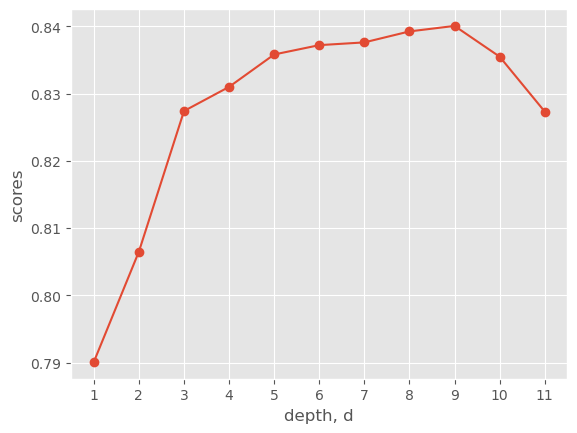

In [22]:
# Run an inertia model to identify the best number of depths for the classifier

depth = range(1,12)
scores = []

for d in depth: 
    classifier = DecisionTreeClassifier(max_depth = d)
    classifier = classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done".format(d))

plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [23]:
#Create a second Decision Tree Classifier
classifier2 = DecisionTreeClassifier(max_depth=9)
classifier2 = classifier2.fit(X_train, y_train)
classifier2.score(X_test, y_test)

0.8407050758935858

In [24]:
# Print the confusion matrix and classification report
dt_preds2 = classifier2.predict(X_test)
print(confusion_matrix(y_test, dt_preds2))
print(classification_report(y_test, dt_preds2))

[[8913  769]
 [1183 1389]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9682
           1       0.64      0.54      0.59      2572

    accuracy                           0.84     12254
   macro avg       0.76      0.73      0.74     12254
weighted avg       0.83      0.84      0.84     12254



In [25]:
# Find out which of the features are the most important in the first classifier
dt_fi = pd.DataFrame(classifier.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([dt_fi, names], axis = 1)
df_feat_imp.columns = ['Importance','Features']
df_feat_imp.sort_values('Importance', ascending = False)

,Importance,Features
1,0.573896,trip_count
3,0.101608,dock_count
4,0.062915,docks_avail_min
2,0.043942,subscribe_percent
0,0.039716,trip_time_sum
16,0.024455,wind_dir_degrees
5,0.021361,max_temperature_f
12,0.019011,max_gust_speed_mph
8,0.017712,mean_dew_point_f
10,0.015470,max_wind_Speed_mph


In [26]:
# Find out which of the features are the most important in the second classifier
dt_fi2 = pd.DataFrame(classifier2.feature_importances_)
names = pd.DataFrame(list(X.columns))
df_feat_imp2 = pd.concat([dt_fi2, names], axis = 1)
df_feat_imp2.columns = ['Importance','Features']
df_feat_imp2.sort_values('Importance', ascending = False)

,Importance,Features
1,0.667379,trip_count
3,0.118577,dock_count
4,0.062856,docks_avail_min
2,0.037563,subscribe_percent
0,0.020014,trip_time_sum
8,0.013060,mean_dew_point_f
16,0.011207,wind_dir_degrees
5,0.008246,max_temperature_f
9,0.008151,mean_humidity
11,0.008018,mean_wind_speed_mph


### Summary 1.4
- This code created two Decision Tree classifiers. The first classifier uses the default value of depth, and the second used an optimized value. 
- The first classifier had a score of 0.7924759262281704, meaning it has a predicted accuracy of 79.25%. This was less accurate than both versions of the logistic regression models in section 1.2 (82.75%) and 1.3 (84.26%). 
- The second classifier had a score of 0.841031499918394, meaning it had a predicted accuracy of 84.10%. The optimization of the max_depth parameter increased the predicted accuracy of the decision tree. This was also less accurate than both versions of the logistic regression models in section 1.2 (82.75%) and 1.3 (84.26%), but more accurate than the default value of depth Decision Tree.  

- The confusion matrices and classification reports also illustrate this point: 
    - The first classifier had f1 scores of .87 and .51 for 0 and 1 respectively. 
    - The second classifier had f1 scores of .90 and .59 for 0 and 1 respectively. 
    - Therefore, the f1 scores were increased for the negative and positive values in the optimized model. The most dramatic change (.50 to .64) occurred in the precision of the positive value.
- The code also identified the most important features in the classifiers. 
    - The first classifier indicated that the most important feature was trip_count, and the second most important was trip_time_sum. This makes sense, as the number of trips on the bikes and the amount of time each trip is taking is most likely to affect whether or not there are any bikes available. The other factors that were important were related to the availability of docks, and the weather. The features with nearly zero impact on the model were the days of the week and the zip-codes. 
   
    - The second classifier also indicated that the most important feature was trip_count, but the second most important feature was dock_count and the third dock_avail_min. This also makes sense, as the number of trips and the number of docks at a station would be directly related to whether any bikes were available. The number of features that were important to the model was smaller in the optimized model, and this seemed to have increased the accuracy. 
   
- Overall, the decision tree models suggest that trip_count is an enormous factor in whether or not a bike may be available, the availability of docks and bikes are also important, and then factors of the weather. The things considered of little or no importance would be the days of the week and the zip codes. 

## Section 1.5: Random Forest

### Description 1.5
- This code creates a Random Forest classifier to analyze the X data

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=90, max_depth = 10, random_state=42)
rf = rf.fit(X_train, y_train)

In [29]:
# Print the scores
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
rf_pred = pd.DataFrame(rf_pred)
# Rename the column Predict_RF
rf_pred = rf_pred.rename(columns = {0: 'Predict_RF'})


0.8430716500734454


In [30]:
# Print the confusion matrix and classification report
print(confusion_matrix(y_test,rf_pred))
print("")
print(classification_report(y_test, rf_pred))

[[9124  558]
 [1365 1207]]

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9682
           1       0.68      0.47      0.56      2572

    accuracy                           0.84     12254
   macro avg       0.78      0.71      0.73     12254
weighted avg       0.83      0.84      0.83     12254



In [31]:
# Discover the most important features in the Random Forest Classifier
fi = pd.DataFrame(rf.feature_importances_)
columns = pd.DataFrame(list(X.columns))
features = pd.concat([columns, fi], axis=1)
features.columns = ['Feature','Importance']
features.sort_values('Importance', ascending=False)

,Feature,Importance
1,trip_count,0.356772
0,trip_time_sum,0.156003
26,zip_94107,0.083056
2,subscribe_percent,0.063984
3,dock_count,0.059943
4,docks_avail_min,0.051151
28,zip_95113,0.034718
19,Saturday,0.024134
16,wind_dir_degrees,0.022834
20,Sunday,0.020493


### Summary 1.5
- This code created a Random Forest classifier using the ensemble package from Sci-kit learn. 
- The calculated accuracy of the model was 0.8430716500734454, or 84.31%. 
- The positive precision was higher than the optimized Decision Tree model, but the positive recall was less accurate. This caused the positive f1-score to be lower for the Random Forest Clasifier than the Optimized Decision Tree. 

- The RF classifier also indicated that trip_count and trip_time_sum were features with high importance, and surprisingly, a particular zip code was identified as the third highest percentage factor. It is possible that this zip code contributes to many of the instances of bikes being unavailable, and illustrates how the RandomForest ensemble method can identify underlying patterns that the other models do not detect. 
- The RF classifier is an ensemble method, so it is possible that optimizing the max_depth or number of estimators might increase the accuracy of the model, which I intend to do in the next section. 

## Section 1.6: Select a test and try to enhance the result

### Description 1.6
- In this section, I will attempt to enhance the results of the Random Forest Classifier from Section 1.5

### Visualization 1.6A

iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done


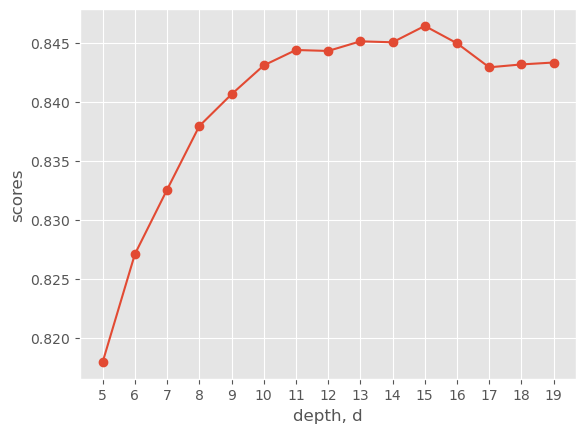

In [32]:
# Run an inertia model to identify the best number of depths for the classifier

depth = range(5,20)
scores = []

for d in depth: 
    rf = RandomForestClassifier(n_estimators=90, max_depth = d, random_state=42)
    rf = rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    print("iteration {} done".format(d))

plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

n_estimator 120 is done
n_estimator 130 is done
n_estimator 140 is done
n_estimator 150 is done
n_estimator 160 is done
n_estimator 170 is done
n_estimator 180 is done


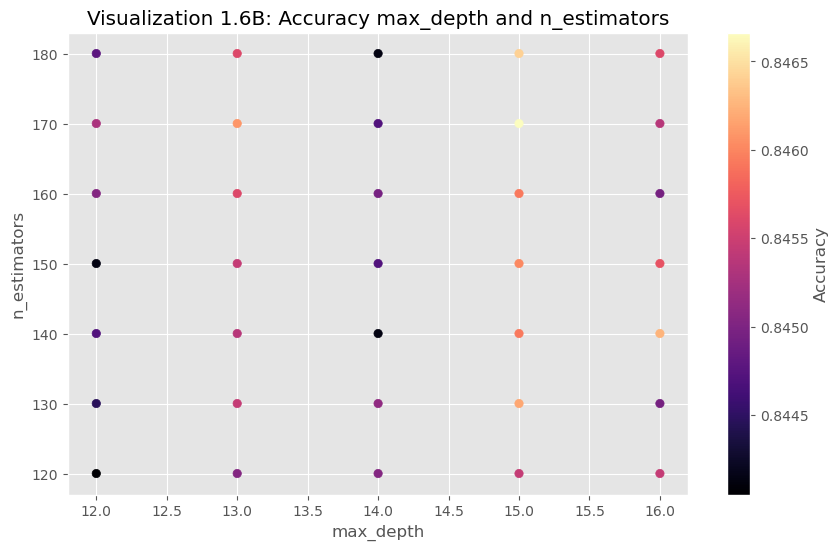

Best Parameters: {'n_estimators': 170, 'max_depth': 15}
Best Score: 0.8466623143463359


In [40]:
''' 
This code uses nested for loops to analyze the best combination 
of n_estimators and max_depth. The ranges selected below were narrowed down 
after running in a much larger range. This is due to the fact that it took
about half an hour to run, the original range was 90 to 180 for n_estimators
and a range of 7 to 20 for max_depth. The code creates a best_score parameter 
and a best_params dictionary that will store the best performing combination. 
'''
# The plot 

n_estimators_range = range(120, 181, 10)  # Range of n_estimators 
max_depth_range = range(12, 17)  # Range of max_depth 

# Initialize variables to store best parameters and score
best_score = 0
best_params = {'n_estimators': None, 'max_depth': None}

# Initialize lists to store scores for each combination
scores = []

# Loop over each combination of n_estimators and max_depth
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Create and train the Random Forest Classifier
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        
        # Calculate the score on the test set
        score = rf.score(X_test, y_test)
        
        # Store the score and parameters
        scores.append((n_estimators, max_depth, score))
        
        # Update the best score and parameters if score beats the best one so far
        if score > best_score:
            best_score = score
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth
        
        #prints the progress, turned off for the sake of visuals
        #print("n_estimators: {}, max_depth: {}, score: {:.4f}".format(n_estimators, max_depth, score))
    print("n_estimator {} is done".format(n_estimators))
    
# Extracts n_estimators, max_depth, and scores for visual
n_estimators_values = [s[0] for s in scores]
max_depth_values = [s[1] for s in scores]
scores_values = [s[2] for s in scores]

# Plot the scores
plt.figure(figsize=(10, 6))
# Set the scatter plot to show max_depth on the x, n_estimators on the y
# set the colors as score_values, and the color gradient to 'magma'
plt.scatter(max_depth_values, n_estimators_values, c=scores_values, cmap='magma', marker='o')
plt.colorbar(label='Accuracy') # created a gradient bar to measure the accuracy (White is best purple worst)
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Visualization 1.6B: Accuracy max_depth and n_estimators')
plt.grid(True) # Set it as a grid
plt.show()

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [35]:
'''
 criterion='entropy', min_samples_split=7, min_samples_leaf=4 were all arrived 
 at via trial and error using the sci-kit learn RandomForestClassifier 
 documentation found at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
''' 
rf = RandomForestClassifier(
        n_estimators=best_params['n_estimators']
        , max_depth = best_params['max_depth']
        , random_state=42
        , criterion='entropy'
        , min_samples_split=7
        , min_samples_leaf=4
    )

rf = rf.fit(X_train, y_train)
# Print the scores 
score = rf.score(X_test, y_test)
print(score)
# Predict the model 
enhance_pred = rf.predict(X_test)
enhance_pred = pd.DataFrame(enhance_pred)
# Rename the column Predict_Enhance
enhance_pred = enhance_pred.rename(columns = {0: 'Predict_Enhance'})

0.8488656765137914


In [36]:
# Print the confusion matrix and classification report
print(confusion_matrix(y_test, enhance_pred))
print("")
print(classification_report(y_test, enhance_pred))

[[9086  596]
 [1256 1316]]

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9682
           1       0.69      0.51      0.59      2572

    accuracy                           0.85     12254
   macro avg       0.78      0.73      0.75     12254
weighted avg       0.84      0.85      0.84     12254



In [37]:
# Discover the most important features in the Random Forest Classifier
fi = pd.DataFrame(rf.feature_importances_)
columns = pd.DataFrame(list(X.columns))
features = pd.concat([columns, fi], axis=1)
features.columns = ['Feature','Importance']
features.sort_values('Importance', ascending=False)

,Feature,Importance
1,trip_count,0.276138
0,trip_time_sum,0.149854
26,zip_94107,0.091224
2,subscribe_percent,0.059012
3,dock_count,0.056598
4,docks_avail_min,0.054567
16,wind_dir_degrees,0.035334
28,zip_95113,0.025867
9,mean_humidity,0.023358
5,max_temperature_f,0.022335


### Summary 1.6
- I built a nested for-loop to try to optimize the accuracy of the RandomForestClassifier's original parameters. After finding the most accurate combination of n_estimators and max_depth, I played around with variations of a few other parameters and found that they had small but positive effects. 
- The changes made were: 
    - n_estimators = 170 - Nested code value
    - max_depth = 15 - Nested code value
    - criterion='entropy' - This measures the quality of a split (See docs)
    - min_samples_split=7 - Minimum number of samples required to split a node
    - min_samples_leaf=4 - minimum number of samples required to be a leaf. 
- Ultimately, it seems like 84.88% was the maximum accuracy I could generate using the random forest classifier. I was able to get the recall of the positive value above 50%, and was able to slightly increase both the f1-score for both the negative and positive values. 
- For the amount of time spent on this section, I do not know if it was worth the extra effort. It was only slightly more accurate. 

## Section 1.7: Create a complete dataset with all predictions

### Description 1.7
- This section creates a new DataFrame called df_bike_results that includes the actual data and predictions from the models. 

In [38]:
# Create a DataFrame named df_bike_results that includes actual data and predictions
df_bike_results = pd.concat([X_test, y_test], axis=1)
df_bike_results = df_bike_results.reset_index()
df_bike_results = pd.concat([df_bike_results, log_pred], axis=1)
df_bike_results = pd.concat([df_bike_results, log_prob], axis=1)
df_bike_results = pd.concat([df_bike_results, dt_preds], axis=1)
df_bike_results = pd.concat([df_bike_results, rf_pred], axis=1)
df_bike_results = pd.concat([df_bike_results, enhance_pred], axis=1)
df_bike_results = pd.DataFrame(df_bike_results)


In [39]:
df_bike_results

,ID,trip_time_sum,trip_count,subscribe_percent,dock_count,docks_avail_min,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,...,zip_94107,zip_94301,zip_95113,bikes_out,Predict_log,Prob_out,Prob_Avail,Predict_Tree,Predict_RF,Predict_Enhance
0,29952,96,9,0.555556,19,7,68,57,46,47,...,1,0,0,1,0,0.924069,0.075931,0,0,0
1,3168,3054,10,0.500000,15,6,70,60,49,48,...,1,0,0,0,0,0.862788,0.137212,0,0,0
2,33945,11,1,1.000000,19,8,70,61,51,48,...,0,0,1,0,0,0.963885,0.036115,0,0,0
3,35374,291,28,1.000000,15,4,63,58,52,50,...,1,0,0,1,1,0.399557,0.600443,1,1,1
4,4156,221,19,0.789474,15,0,68,60,52,51,...,1,0,0,0,0,0.810541,0.189459,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12249,10458,68,6,0.833333,15,6,77,62,46,34,...,0,0,1,0,0,0.921567,0.078433,0,0,0
12250,9109,26,3,0.666667,15,3,63,57,50,47,...,1,0,0,0,0,0.945084,0.054916,0,0,0
12251,37297,31,4,0.750000,15,6,91,77,62,59,...,0,0,1,0,0,0.915520,0.084480,0,0,0
12252,9870,5,1,1.000000,19,7,63,56,48,49,...,0,0,1,0,0,0.967745,0.032255,0,0,0


### Summary 1.7
- This section of code created a new DataFrame, df_bike_results, and concatanated the results from the models alongside the X_test and y_test values. 
- This code gives a row based view of how each row was predicted alongside the actual values for bikes_out. 

## Section 1.8: Final Analysis

### Summary - Final Analysis

The above code created various models that attempted to predict whether or not a particular station would be out of bikes given the features of the given dataset. The results of each model are compared and analyzed below. 

####  Logistic Regression models

In this code I produced two Logistic Regression models. The first model, Section 1.2, was performed on a raw dataset (X_train, y_train) and the second model, Section 1.3, was performed on a scaled dataset (X_trainSC, y_trainSC). 

##### Results for Logistic Regression

| Metric            | Raw Logistic Regression (1.2)   |Scaled Logistic Regression (1.3) |
| :---------------- | :------------------------- |:------------------------- |
| **Accuracy**      | 0.8275665088950547         |0.8426636200424351       |
| **0 - Precision** | .85                        |.87                       |
| **0 - recall**    | .94                        |.94                        |
| **0 - f1-score**  | .90                        |.90                        |
| **1 - Precision** | .65                        |.67                       |
| **1 - recall**    | .39                        |.48                       |
| **1 - f1-score**  | .49                        |.56                        |


##### Conclusions on Logistic Regression 

My conclusion is that the scaled logistic regression model is more accurate, especially when predicting instances when a station will run out of bikes. 
- The scaled logistic regression model (84.27%) had greater overall accuracy at predicting whether a station would run out of bikes than the raw logistic regression model (82.76%).
- The precision of .85 and .87 indicate that when the model predicts that the station does not run out of bikes, they are correct about 85-87% of the time. 
- The precision of .65 and .67 indicate that when the model predicts a station does run out of bikes, it is correct 65-67% of the time. This is less accurate that the negative cases, but well over half. 
- The recall of .94 for Negative values indicates that the model is very good at identifying instances where the station does not run out of bikes. 
- The recall of .39 for the Raw LR model, and .48 for the Scaled LR model, indicates that the model is relatively poor at identifying instances where the station does run out of bikes. 
- The scaled model performed better at predicting True Negatives (correctly predicting cases when the station would not run out of bikes), and False Positives (less instances of guessing it would run out of bikes when it did not), as well as predicting the true positive cases (correctly predicting cases when the station would run out of bikes). This improved the f1-score of the positive cases from .49 to .56. 


#### Decision Tree Models

In these sections, I provided two Decision Tree models. The first model ran using the default parameter for the max_depth of the Decision Tree. The second Decision Tree model used a value for max_depth that was generated using an inertia model in Visualization 1.4.A. Each model also produced a table of features and their calculated weighted performance. The results of each model are compared and analyzed below. They are then compared to the Logistic Regression models. 

##### Classification Results for Decision Trees
| Metric            | Unoptimized Decision Tree  |Optimized Decision Tree    |
| :---------------- | :------------------------- |:------------------------- |
| **Accuracy**      |0.7908438061041293          | 0.8401338338501714        |
| **0 - Precision** | .87                        | .88                       |
| **0 - Recall**    | .86                        | .92                       |
| **0 - f1-score**  | .87                        | .90                       | 
| **1 - Precision** | .50                        | .64                       | 
| **1 - Recall**    | .52                        | .54                       | 
| **1 - f1-score**  | .51                        | .59                       |

##### Feature Comparisons for Decision Trees

| Rank | Unoptimized Feature  | Unoptimized Importance | Optimized Feature    | Optimized Importance |
|------|----------------------|------------------------|----------------------|----------------------|
| 1    | trip_count           | 0.573615               | trip_count           | 0.666410             |
| 2    | dock_count           | 0.101577               | dock_count           | 0.118485             |
| 3    | docks_avail_min      | 0.064586               | docks_avail_min      | 0.063496             |
| 4    | subscribe_percent    | 0.045645               | subscribe_percent    | 0.037957             |
| 5    | trip_time_sum        | 0.039359               | trip_time_sum        | 0.021312             |
| 6    | max_temperature_f    | 0.019426               | mean_dew_point_f     | 0.012620             |
| 7    | mean_humidity        | 0.018687               | wind_dir_degrees     | 0.010400             |
| 8    | mean_dew_point_f     | 0.016444               | mean_humidity        | 0.008595             |
| 9    | max_wind_Speed_mph   | 0.014675               | max_gust_speed_mph   | 0.008384             |
| 10   | mean_temperature_f   | 0.012137               | mean_wind_speed_mph  | 0.008383             |


##### Conclusions on Decision Trees
My conclusion is that the optimization of the max_depth parameter had a very positive effect on the accuracy of the model. The Optimized Decision Tree had a better metric across accuracy, precision, recall and f1-score compared to the unoptimized version. 

The first classifier indicated that the most important feature was trip_count, and the second most important was dock_count. This makes sense, as the number of trips on the bikes and the number of docks available would have a direct impact on whether or not there are will be any bikes available. The other factors that were important were related to the availability of docks, the amount of time being spent on the trips, and the weather. The features with nearly zero impact on the model were the days of the week and the zip-codes. 
   
The second classifier also indicated that the most important feature was trip_count, and the second most important was dock_count. The number of features that were important to the model was smaller in the optimized model, and this seemed to have increased the accuracy. The features with very low impact on the optimized decision tree were also the days of the week and the zip codes. 

The Optimized decision tree's Positive f1-score of .59 is the highest score yet for predicting instances when a station would be out of bikes, and over 66% of that prediction is based upon the number of trips, and 78% based upon the number of trips and the number of docks at the station. 

#### Random Forest Classifiers

In these sections, 1.5 - 1.6, I built Random Forest models using sci-kit learn's ensemble package. This method creates many Decision Trees, and then sums their results. The first Random Forest model used the parameters of 90 for n_estimators (number of trees) and a max_depth of 10. This produced the 1.5 results that are shown and analyzed below. The second Random Forest model, Section 1.6, uses a nested for-loop to identify the optimal value for the n_estimators and max_depth parameters. It then uses some slightly tweaked parameters to produce a higher accuracy model. Both models then produced a list of most important features and their weights, and those are compared below. 


##### Classification Report for Random Forest Classifiers
| Metric            | Unoptimized Random Forest  |Optimized Random Forest    |
| :---------------- | :------------------------- |:------------------------- |
| **Accuracy**      |0.8430716500734454          | 0.8488656765137914        |
| **0 - Precision** | .87                        | .88                       |
| **0 - Recall**    | .94                        | .94                       |
| **0 - f1-score**  | .90                        | .91                       | 
| **1 - Precision** | .68                        | .69                       | 
| **1 - Recall**    | .47                        | .51                       | 
| **1 - f1-score**  | .56                        | .59                       |

#####  Feature Comparisons for Random Forest

| Rank | Unoptimized Random Forest  | Unoptimized Importance | Optimized Random Forest    | Optimized Importance |
|------|----------------------|------------------------|----------------------|----------------------|
| 1    | trip_count           | 0.219573               | trip_count           | 0.276138             |
| 2    | trip_time_sum        | 0.146114               | trip_time_sum        | 0.149854             |
| 3    | subscribe_percent    | 0.079638               | zip_94107            | 0.091224             |
| 4    | docks_avail_min      | 0.070390               | subscribe_percent    | 0.059012             |
| 5    | dock_count           | 0.056578               | dock_count           | 0.056598             |
| 6    | wind_dir_degrees     | 0.043032               | docks_avail_min      | 0.054567             |
| 7    | zip_94107            | 0.041979               | wind_dir_degrees     | 0.035334             |
| 8    | mean_humidity        | 0.033488               | zip_95113            | 0.025867             |
| 9    | max_temperature_f    | 0.031358               | mean_humidity        | 0.023358             |
| 10   | max_gust_speed_mph   | 0.030884               | max_temperature_f    | 0.022335             |

##### Conclusions on the Random Forest models 

My conclusion is that the Optimized Random Forest model is more accurate than the unoptimized version in Section 1.5. The overall accuracy of the model is only slightly higher at 84.89% than 84.31%, but each of the precision and recall features performed better as well. Looking at the feature comparisons, both models identified the trip_count and trip_time_sum as the two most important features, accounting for about 35% to 42% of the prediction. Both models had surprises with zip_codes appearing in the top 10 values. The optimized value identified one zip code as accounting for over 9% of the prediction, which is a considerable departure from the previous models that ranked them as practically unimportant to their modelling. Perhaps the complexity of the Random Forest processes have uncovered a relationship that is not easily identified in the other models. 

#### Comparing all of the models 

| Metric            | Raw Logistic Regression (1.2) | Scaled Logistic Regression (1.3) | Unoptimized Decision Tree | Optimized Decision Tree | Unoptimized Random Forest | Optimized Random Forest |
| :---------------- | :---------------------------: | :------------------------------: | :-----------------------: | :---------------------: | :-----------------------: | :---------------------: |
| **Accuracy**      | 0.8275665088950547            | 0.8426636200424351               | <span style="color: red">0.7908438061041293</span> | 0.8401338338501714      | 0.8430716500734454        | <span style="color:green">0.8488656765137914</span> |
| **0 - Precision** | <span style="color: red">0.85</span>                          | 0.87                             | 0.87| <span style="color:green">0.88</span> | 0.87| <span style="color:green">0.88</span> |
| **0 - Recall**    | <span style="color: green">0.94</span> | <span style="color: green">0.94</span> | 0.86                      | 0.92                    | <span style="color:green">0.94</span> | <span style="color:green">0.94</span> |
| **0 - f1-score**  | 0.90                          | 0.90                             | <span style="color:red">0.87</span>                      | 0.90                    | 0.90                      | <span style="color:green">0.91</span> |
| **1 - Precision** | 0.65                          | 0.67                             | <span style="color: red">0.50</span> | 0.64                    | 0.68                      | <span style="color:green">0.69</span> |
| **1 - Recall**    | <span style="color: red">0.39</span> | 0.48                             | 0.52                      | <span style="color:green">0.54</span>                    | 0.47                      | 0.51 |
| **1 - f1-score**  | <span style="color: red">0.49</span> | 0.56                             | 0.51                      | <span style="color: green">0.59</span>                    | 0.56                      | <span style="color:green">0.59</span> |


In the table above, green indicates the highest value relative to the other models, and red indicates the lowest. The Optimized Random Forest model produced the best results across most of the features in the classification report. There is only one area where the Optimized Random Forest model was outperformed, and that was in Positive recall. This is a measure of how good the model is at identifying when a station runs out of bikes, which is outperformed by the Optimized Decision Tree model (54% to 51%). The Optimization of the Random Forest model improved this area of the model from .47 to .51, so it is possible that further parameter tuning could produce results better than the Optimized Decision Tree model. The Unoptimized Decision Tree was the lowest accuracy model owing mostly to a verly low positive precision relative to the other models. Overall, I was very pleased with the results of my optimization code. I read the documentation and messed around with various values and landed on a set of parameters that maximized my models accuracy. I am very curious to know if it is possible to increase the model to higher values, and what methods would need to be used to reach that level of accuracy. 

##### Comparing feature importances 

The Optimized Decision tree placed the most weight on the least number of features. Over 78% of the model's prediction came from the first two most important features, trip_count and dock_count. This model gave nearly 0% of its weight to zip code and day of the week. 
The Random Forest models were interesting, because they did not give as heavy weights, and identified some relationships that were not being used in the Decision Tree models. Overall, it appears that trip_count, dock_count, trip_time_sum were the most important factors, followed by considerations of weather. If the Optimized Random Forest model is to be believed, one zip code is important for identifying instances when a station will run out of bikes. It is possible that the complexity of the model identified the location where most of these events occur. I was surprised that weekends and weather did not play as big of a role in the model. 

#### Conclusion

In this assignment, I built Logistic Regression, Decision Tree, and Random Forest models. I used these models to analyze a dataset to identify instances when a bike station runs out of bikes in a bike share program. Through processes of optimization of parameters, I was able to produce a model that was more accurate than the default options available from Sci-kit learn. Going forward, I want to hone my skills at tuning parameters and to learn more about other methods that can produce more useful models. 

 